In [1]:
import pype.client_api as dp
import pyfolio as pf
import pandas as pd
import empyrical as ep
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import datetime
import time
import matplotlib.pyplot as plt
%matplotlib inline


/devbooks/.venv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Getting the  Assets Data

In [2]:
def prepare_fund_return_series(symbol):
    temp = dp.fund(symbol=symbol, tag="net_asset_value", start="2008-01-01", end="2018-01-01")[["date","net_asset_value"]]
    temp = temp.set_index("date");
    f = temp["net_asset_value"]
    f.index = pd.to_datetime(f.index).tz_localize('UTC')
    f = f[f>0.0]
    fund_returns = f.pct_change()
    return fund_returns

In [3]:
portfolio_list = ["TYH", "TE3", "TOT", "TNK", "TUA"]
df = pd.DataFrame()
for item in portfolio_list:
    df[item] = prepare_fund_return_series(item)
df

,TYH,TE3,TOT,TNK,TUA
date,,,,,
2008-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2008-01-03 00:00:00+00:00,-0.015172,-0.013085,NaN,NaN,0.015629
2008-01-04 00:00:00+00:00,-0.004216,-0.003363,NaN,NaN,-0.003756
2008-01-07 00:00:00+00:00,-0.008181,-0.008737,NaN,NaN,0.003310
2008-01-08 00:00:00+00:00,0.009500,0.009697,NaN,NaN,0.004216
2008-01-09 00:00:00+00:00,-0.006740,-0.004556,NaN,NaN,0.008122
2008-01-10 00:00:00+00:00,-0.002881,-0.006659,NaN,NaN,-0.006156
2008-01-11 00:00:00+00:00,-0.006870,-0.004566,NaN,NaN,0.009108
2008-01-14 00:00:00+00:00,-0.006788,-0.004537,NaN,NaN,0.016157


In [4]:
asset_data = df.iloc[1:]
asset_data

,TYH,TE3,TOT,TNK,TUA
date,,,,,
2008-01-03 00:00:00+00:00,-0.015172,-0.013085,NaN,NaN,0.015629
2008-01-04 00:00:00+00:00,-0.004216,-0.003363,NaN,NaN,-0.003756
2008-01-07 00:00:00+00:00,-0.008181,-0.008737,NaN,NaN,0.003310
2008-01-08 00:00:00+00:00,0.009500,0.009697,NaN,NaN,0.004216
2008-01-09 00:00:00+00:00,-0.006740,-0.004556,NaN,NaN,0.008122
2008-01-10 00:00:00+00:00,-0.002881,-0.006659,NaN,NaN,-0.006156
2008-01-11 00:00:00+00:00,-0.006870,-0.004566,NaN,NaN,0.009108
2008-01-14 00:00:00+00:00,-0.006788,-0.004537,NaN,NaN,0.016157
2008-01-15 00:00:00+00:00,-0.015719,-0.010471,NaN,NaN,-0.001777


## Getting the Market Data

In [5]:
market_data = dp.index(symbol = 'XU100', start="2008-01-01", end="2018-01-01")
market_data['Returns'] = market_data['adjusted_close'].pct_change()
market_data

,symbol,adjusted_close,date,Returns
0,XU100,54708.4,2008-01-02,NaN
1,XU100,53541.3,2008-01-03,-0.021333
2,XU100,52529.9,2008-01-04,-0.018890
3,XU100,52569.5,2008-01-07,0.000754
4,XU100,53235.9,2008-01-08,0.012677
5,XU100,52730.7,2008-01-09,-0.009490
6,XU100,52351.0,2008-01-10,-0.007201
7,XU100,51920.6,2008-01-11,-0.008221
8,XU100,51480.9,2008-01-14,-0.008469
9,XU100,50377.3,2008-01-15,-0.021437


### We detected that the size of these two data vectors were different

In [6]:
len(asset_data['TYH'].values), len(market_data['Returns'].values)

(2513, 2517)

In [7]:
l1= set([str(e).split()[0] for e in asset_data.index])
l2= set(market_data["date"])
extra_dates = list(l2-l1)
extra_dates

['2017-11-08', '2016-01-04', '2008-01-02', '2017-11-16']

### To remedy this problem we reindex market_data with the index of asset_data since latter's size is smaller than former's size.

In [8]:
market_data.set_index("date", inplace = True)

In [9]:
"""new_index = [str(e).split()[0] for e in asset_data.index]
asset_data = asset_data.reset_index(drop = True)
asset_data.reindex(new_index)"""

'new_index = [str(e).split()[0] for e in asset_data.index]\nasset_data = asset_data.reset_index(drop = True)\nasset_data.reindex(new_index)'

In [10]:
market_data.index = pd.to_datetime(market_data.index).tz_localize('UTC')
market_data.index, asset_data.index

(DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
                '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
                '2008-01-14', '2008-01-15',
                ...
                '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
                '2017-12-22', '2017-12-25', '2017-12-26', '2017-12-27',
                '2017-12-28', '2017-12-29'],
               dtype='datetime64[ns, UTC]', name='date', length=2517, freq=None),
 DatetimeIndex(['2008-01-03', '2008-01-04', '2008-01-07', '2008-01-08',
                '2008-01-09', '2008-01-10', '2008-01-11', '2008-01-14',
                '2008-01-15', '2008-01-16',
                ...
                '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
                '2017-12-22', '2017-12-25', '2017-12-26', '2017-12-27',
                '2017-12-28', '2017-12-29'],
               dtype='datetime64[ns, UTC]', name='date', length=2513, freq=None))

In [11]:
market_data = market_data.reindex(asset_data.index)
market_data

,symbol,adjusted_close,Returns
date,,,
2008-01-03 00:00:00+00:00,XU100,53541.3,-0.021333
2008-01-04 00:00:00+00:00,XU100,52529.9,-0.018890
2008-01-07 00:00:00+00:00,XU100,52569.5,0.000754
2008-01-08 00:00:00+00:00,XU100,53235.9,0.012677
2008-01-09 00:00:00+00:00,XU100,52730.7,-0.009490
2008-01-10 00:00:00+00:00,XU100,52351.0,-0.007201
2008-01-11 00:00:00+00:00,XU100,51920.6,-0.008221
2008-01-14 00:00:00+00:00,XU100,51480.9,-0.008469
2008-01-15 00:00:00+00:00,XU100,50377.3,-0.021437


## Regression Part

In [12]:
X = market_data['Returns'].values
Y = asset_data['TYH'].values
len(X), len(Y)

(2513, 2513)

In [13]:
def linreg(x,y):
    # We add a constant so that we can also fit an intercept (alpha) to the model
    # This just adds a column of 1s to our data
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print ('alpha: ' + str(alpha))
print ('beta:' + str(beta))

alpha: 0.00014934607353612984
beta:0.8089816766528074


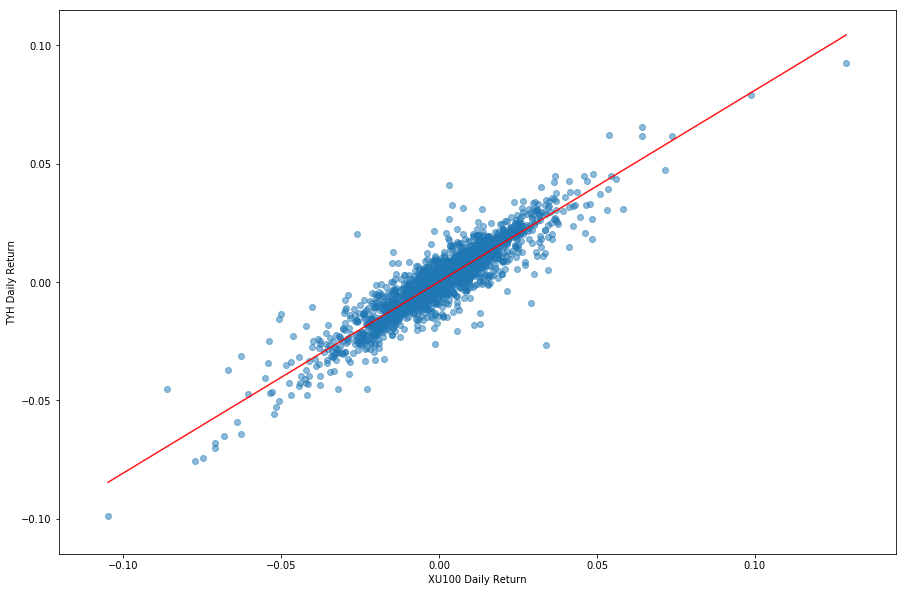

In [15]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize = (15,10))
plt.scatter(X, Y, alpha=0.5) # Plot the raw data
plt.xlabel("XU100 Daily Return")
plt.ylabel("TYH Daily Return")

 # Add the regression line, colored in red

plt.plot(X2, Y_hat, 'r', alpha=0.9);
#plt.figure(figsize = (30,30))

## Hedging the Market

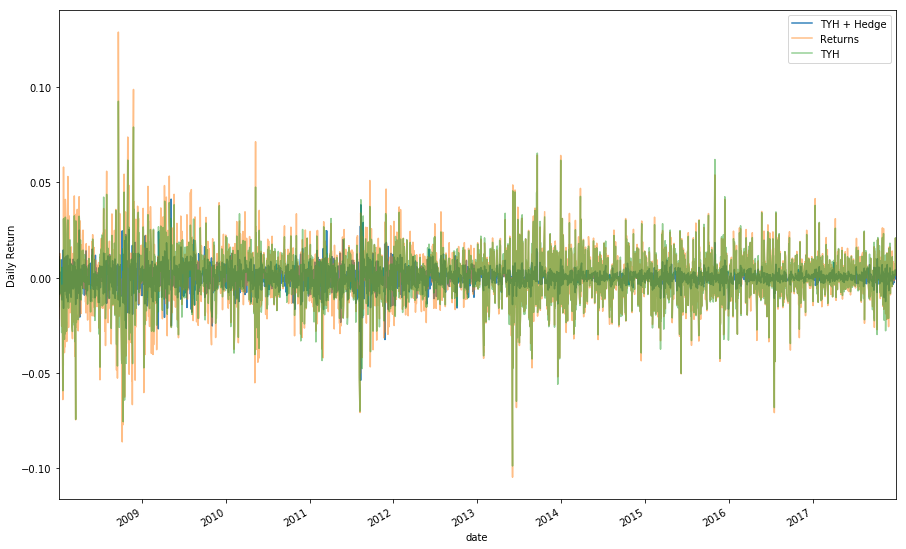

In [16]:
portfolio = -1*beta*market_data['Returns'] + asset_data['TYH']
portfolio.name = "TYH + Hedge"

# Plot the returns of the portfolio as well as the asset by itself
plt.figure(figsize = (15,10))
portfolio.plot(alpha=0.9)
market_data['Returns'].plot(alpha=0.5);
asset_data['TYH'].plot(alpha=0.5);
plt.ylabel("Daily Return")
plt.legend();

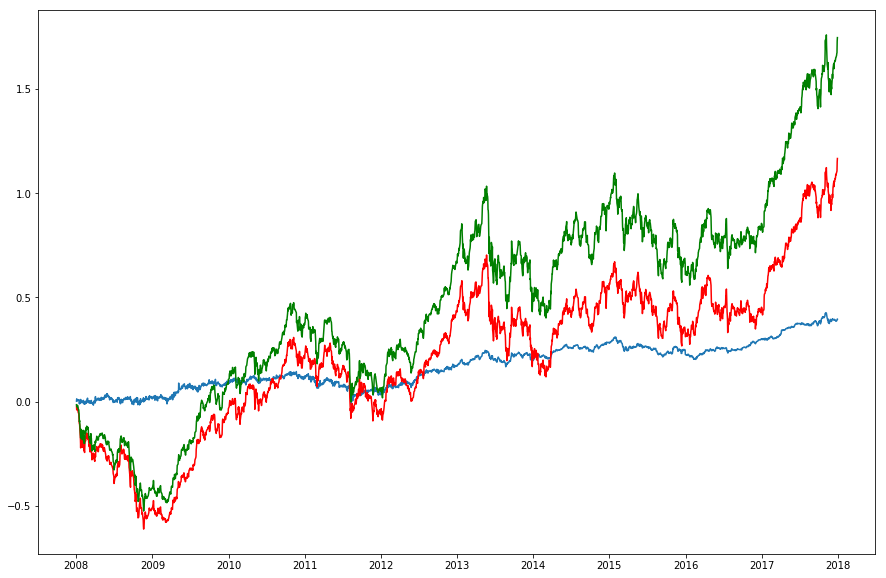

In [19]:
plt.figure(figsize = (15,10))
plt.plot((ep.cum_returns(portfolio)))
plt.plot(ep.cum_returns(market_data['Returns']), color = 'r')
plt.plot(ep.cum_returns(asset_data['TYH']), color = 'g')

In [20]:
print ("means: ", ep.annual_return(portfolio), ep.annual_return(asset_data['TYH']))
print ("volatilities: ", ep.annual_volatility(portfolio), ep.annual_volatility(asset_data['TYH']))

means:  0.03398662452181389 0.10662218877662077
volatilities:  0.09175591610122821 0.22940031642892475


In [21]:
P = portfolio.values
alpha, beta = linreg(X,P)
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))

alpha: 0.00014934607353613052
beta: -6.179149819449852e-16


## Ratio of Means With Respect To(WRT) Hedging

In [22]:
(ep.annual_return(portfolio)/ep.annual_return(asset_data['TYH']))-1

-0.6812424795272427

In [23]:
(ep.annual_volatility(portfolio)/ep.annual_volatility(asset_data['TYH']))-1

-0.6000183542481861

## Dynamic Hedging

### Flow is:
1-) i-) Obtain the start and end date information for each year
    ii-) Append these into the starts and ends lists
    
    #### In For Loop
2-) i-) Apply linear reggression to calculate alpha and beta for hedging
    ii-) Append these into the alphas and betas lists
    
3-) Plot the each regression graph

4-) Obtain the hedged_means, non_hedged_means, hedged_volatilities, non_hedged_volatilities, hedged_max_drawdowns, non_hedged_max_drawdowns informations

5-) Define mean ratios and volatility ratios as after hedge over before hedge percentage(hedged/non_hedged-1)

6-) Create a data frame which includes all these informations to have a nice compact structure

7-) Plot the scatter graph which it's x axis is mean_ratios and it's y axis is volatility_ratios.
Use this information to understand how much mean losses corresponds to the how much volatility losses

In [24]:
#asset_data.groupby(asset_data.index.year).apply(lambda x: ep.cum_returns_final(x)).index


### 1-) Obtaining the starts and ends lists

In [49]:
asset_data.resample('BA').last().index

DatetimeIndex(['2008-12-31', '2009-12-31', '2010-12-31', '2011-12-30',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-30', '2017-12-29', '2018-12-31'],
              dtype='datetime64[ns, UTC]', name='date', freq='BA-DEC')

In [25]:
from datetime import datetime
list_of_Safak = asset_data.resample('BA').last().index.strftime("%Y-%m-%d").tolist()

In [26]:
starts = [str(i).split()[0] for i in asset_data.resample('BAS').first().index]
#starts = [i for i in asset_data.resample('BAS').first().index]
starts

['2008-01-01',
 '2009-01-01',
 '2010-01-01',
 '2011-01-03',
 '2012-01-02',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01',
 '2016-01-01',
 '2017-01-02']

In [27]:
asset_data.loc['2008-01-03']

TYH   -0.015172
TE3   -0.013085
TOT         NaN
TNK         NaN
TUA    0.015629
Name: 2008-01-03 00:00:00+00:00, dtype: float64

In [28]:
ends = [str(i).split()[0] for i in asset_data.resample('BA').first().index]
ends = ends[:-1]
ends

['2008-12-31',
 '2009-12-31',
 '2010-12-31',
 '2011-12-30',
 '2012-12-31',
 '2013-12-31',
 '2014-12-31',
 '2015-12-31',
 '2016-12-30',
 '2017-12-29']

### Some early calcuations to make sure the things gonna be well behave

In [56]:
asset_data['TYH'].loc[starts[0]:ends[0]].values,
#asset_data.loc[starts[0]:ends[0]]['TYH'].values

(array([-1.51718540e-02, -4.21593178e-03, -8.18106577e-03,  9.50027281e-03,
        -6.74021556e-03, -2.88082968e-03, -6.86976341e-03, -6.78798849e-03,
        -1.57190744e-02, -2.87991006e-02, -1.48095189e-02,  5.45994886e-03,
        -5.93208688e-02, -1.20204604e-02, -2.27062609e-02,  3.09153517e-02,
         1.93437087e-02, -3.23718987e-02,  8.89401608e-03, -5.23772638e-03,
        -2.94782899e-02,  3.17490640e-02,  2.27365303e-02, -1.28896774e-02,
        -2.80966878e-02, -2.47197796e-02, -8.90023992e-03, -7.80883961e-05,
         3.03397111e-02,  2.86883693e-02,  1.68361332e-02, -1.59776820e-02,
         1.81516937e-02,  1.50435757e-02, -1.29680430e-02,  1.98881068e-02,
        -9.16619479e-03, -4.85766332e-03,  1.07677399e-03,  6.91979492e-03,
        -4.87822248e-03, -2.43675529e-02, -2.82402993e-02, -4.15157005e-03,
         6.40491170e-03, -7.87045754e-03, -2.46716769e-02, -4.12515567e-03,
         3.24736225e-02,  2.56614057e-02, -3.35067715e-02,  8.93436677e-03,
        -7.4

In [29]:
non_hedged_means = [asset_data['TYH'].loc[i:j].mean() for i,j in zip(starts,ends)]
non_hedged_means

[-0.0019116035323168373,
 0.002642884476993387,
 0.000923204856609635,
 -0.0009288871132007826,
 0.0018559687197445653,
 -0.00018831488576259226,
 0.0010833344363790198,
 -0.0006702016999938411,
 0.0006424172846236735,
 0.001610717788423793]

In [30]:
#non_hedged_means2 = [asset_data['TYH'].loc[starts[i]:ends[i]].mean() for i in range(len(starts)-1)]
#non_hedged_means2

In [31]:
#asset_data.loc[starts[0]:ends[0]]['TYH']

In [33]:
non_hedged_volatilities = [asset_data['TYH'].loc[i:j].std() for i,j in zip(starts,ends)]
non_hedged_volatilities

[0.021715778131978024,
 0.01463212697641382,
 0.012360812107082028,
 0.014591865586602075,
 0.009164494065317138,
 0.018778799669518065,
 0.012251574370989948,
 0.014264837544527556,
 0.012072621943040682,
 0.009621146253858159]

### In "for" loop: Step 2,3,4

Regression Graphs for: 2008-01-01-2008-12-31
Regression Graphs for: 2009-01-01-2009-12-31
Regression Graphs for: 2010-01-01-2010-12-31
Regression Graphs for: 2011-01-03-2011-12-30
Regression Graphs for: 2012-01-02-2012-12-31
Regression Graphs for: 2013-01-01-2013-12-31
Regression Graphs for: 2014-01-01-2014-12-31
Regression Graphs for: 2015-01-01-2015-12-31
Regression Graphs for: 2016-01-01-2016-12-30


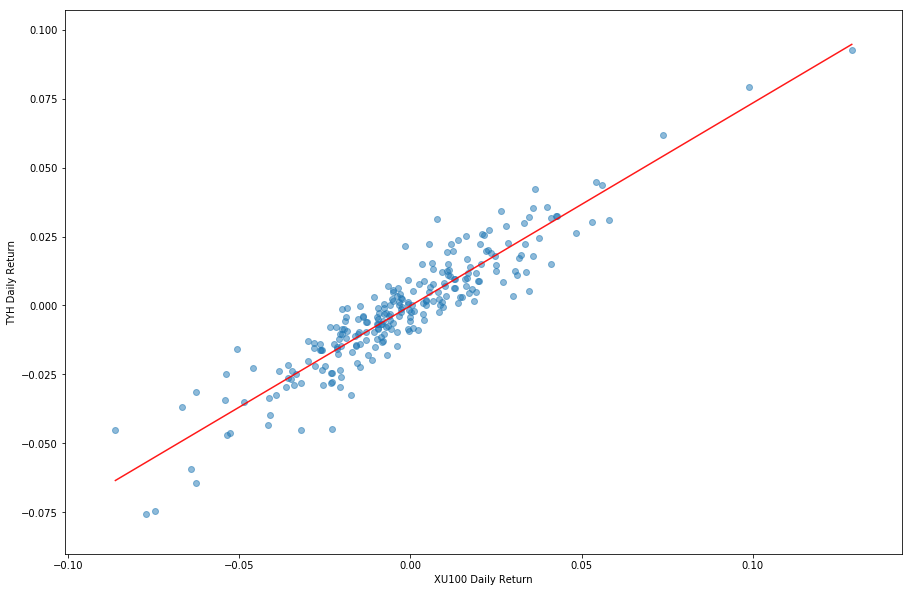

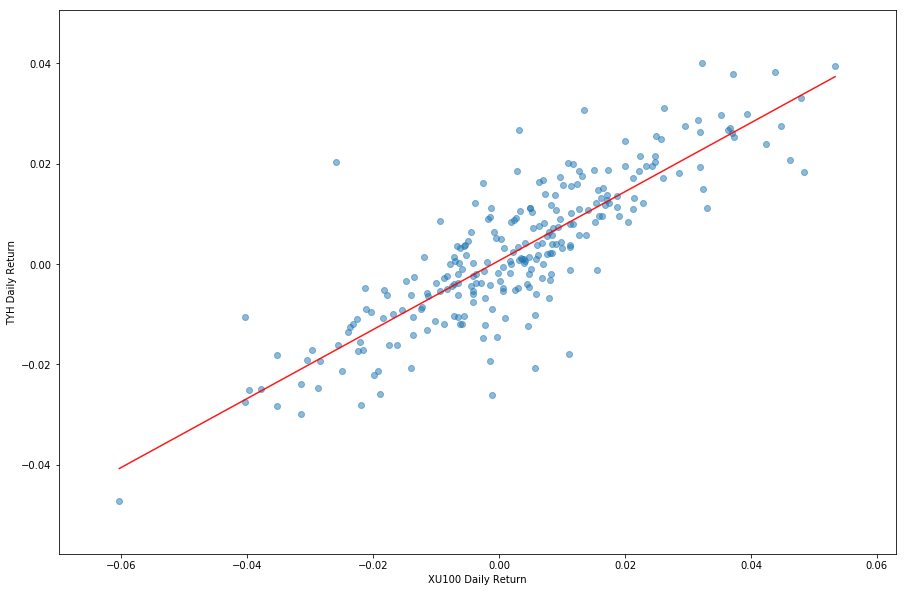

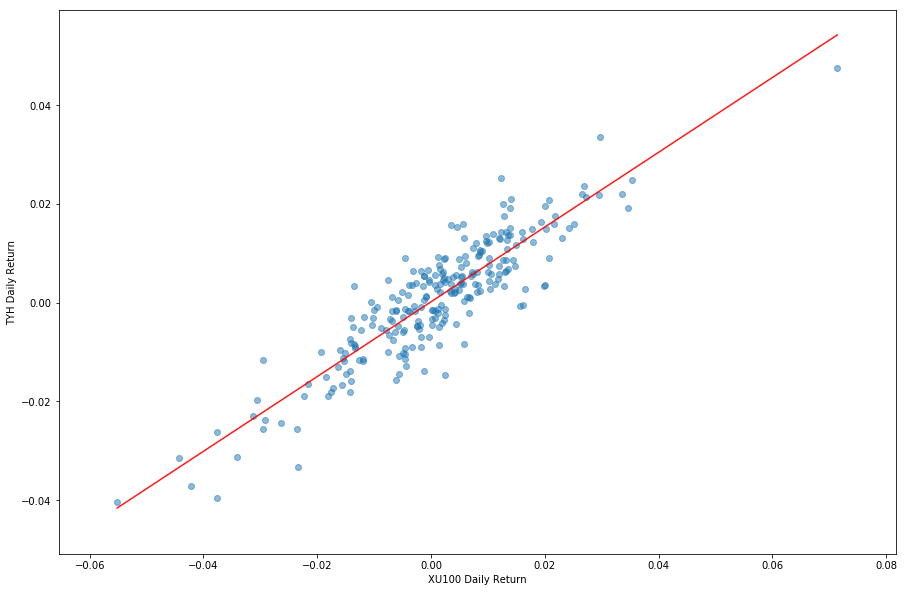

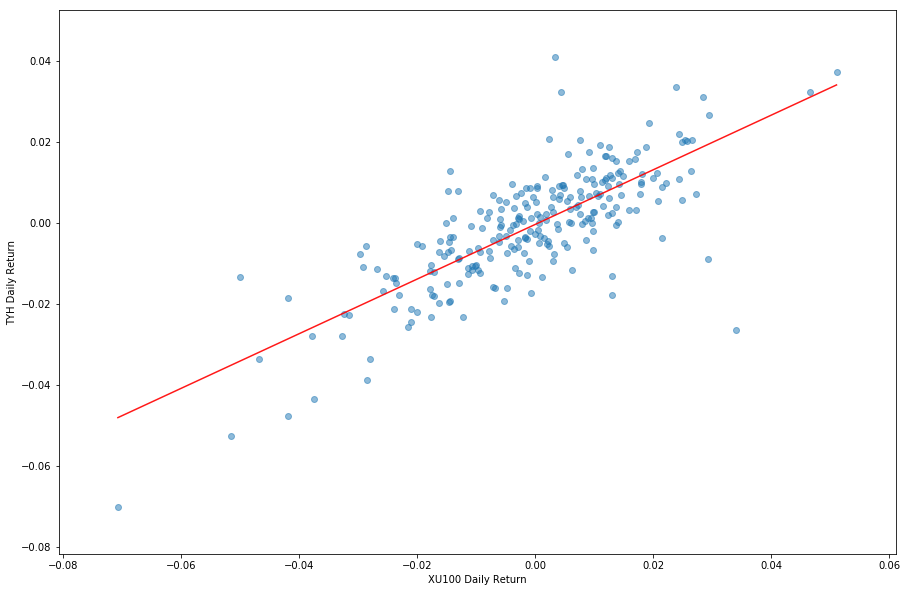

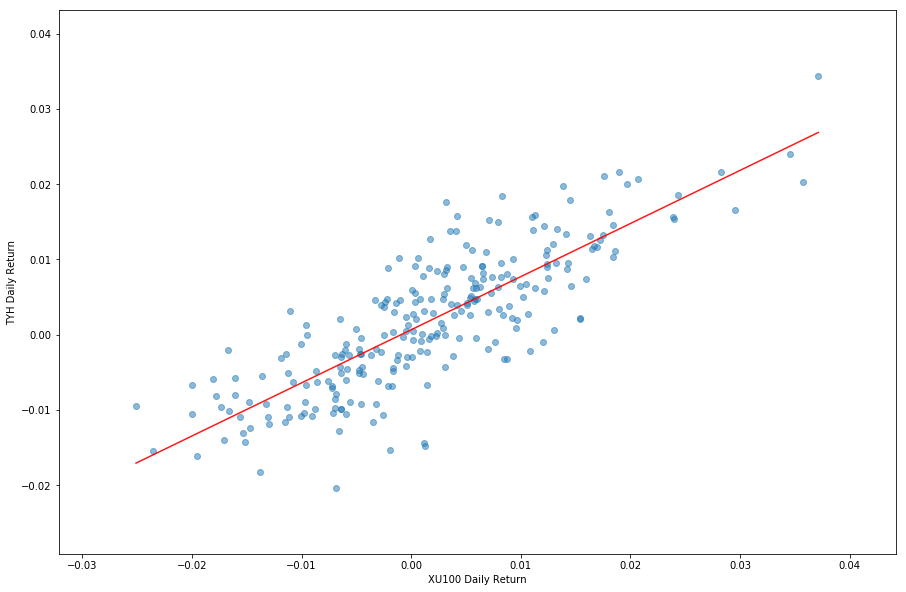

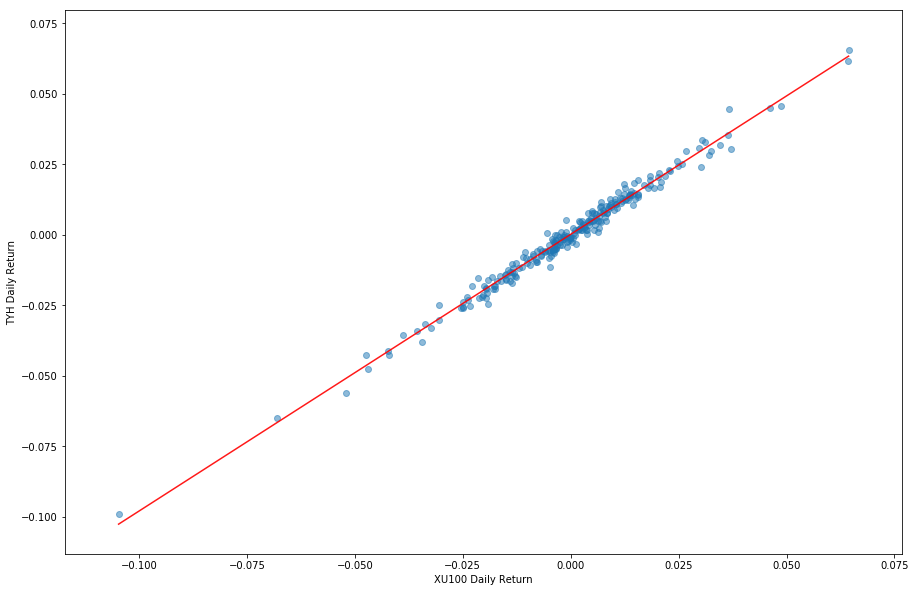

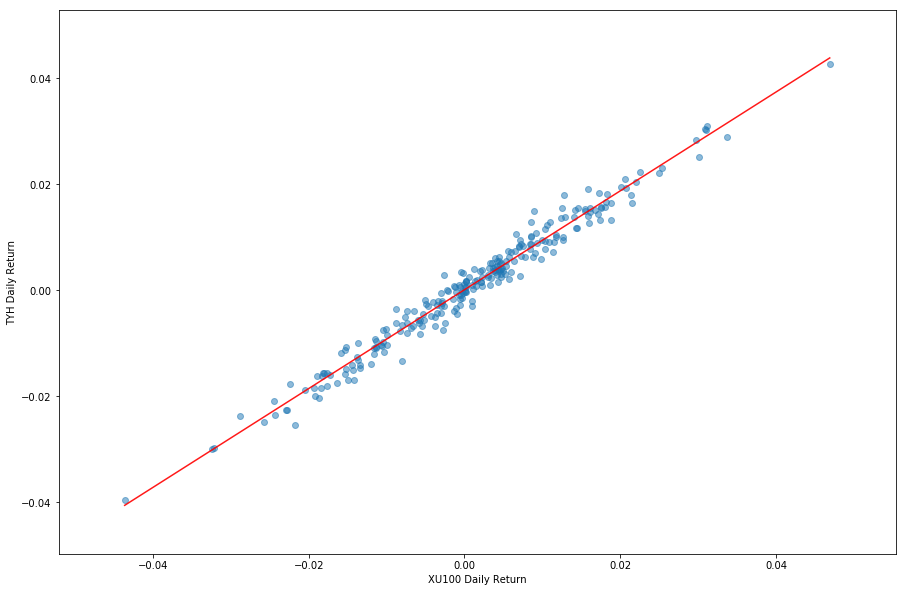

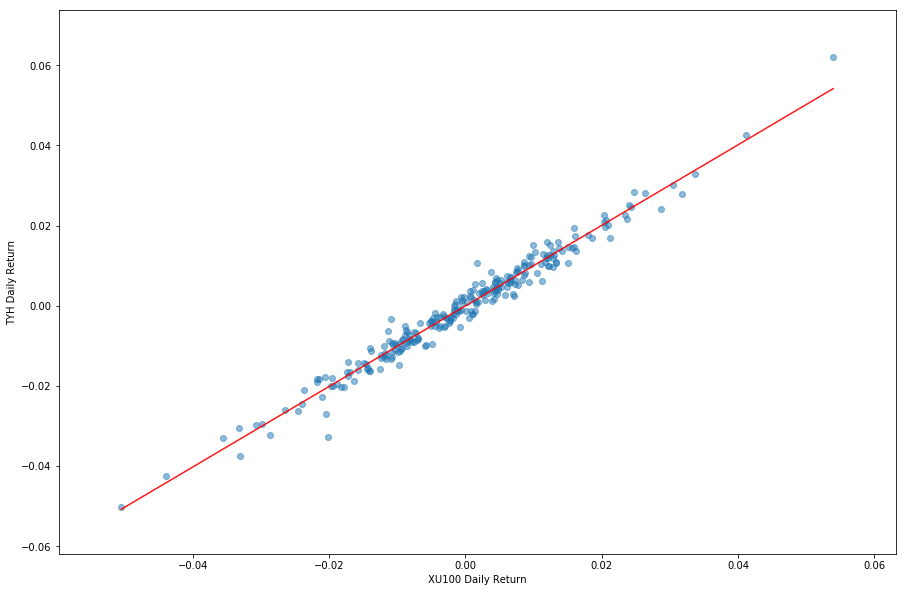

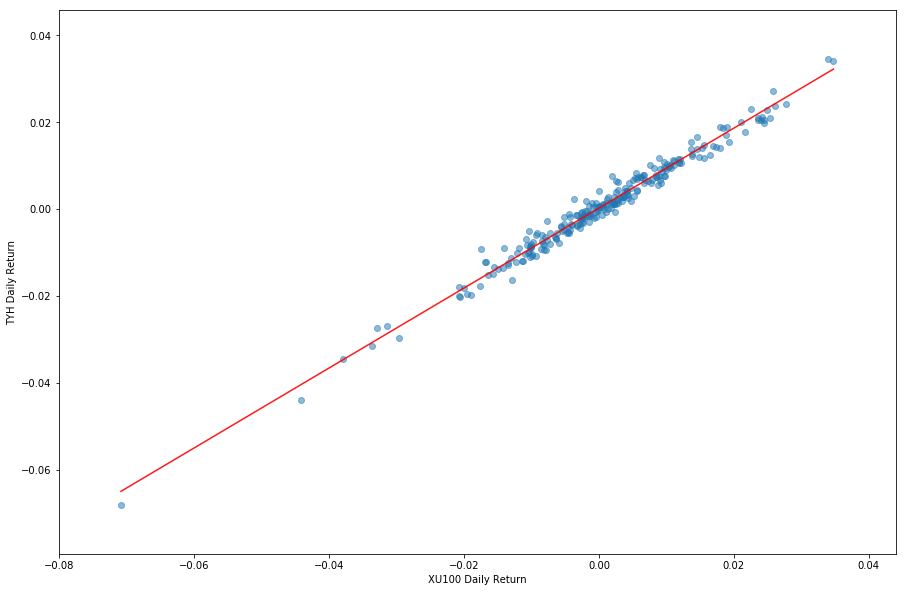

In [34]:
alphas = []
betas = []
hedged_means = []
hedged_volatilities = []
hedged_max_drawdowns = []
NoN_hedged_max_drawdowns = []
NoN_hedged_means = []
NoN_hedged_volatilities = []


for i in range(len(starts)-1):
    X = market_data['Returns'].loc[starts[i]:ends[i]].values
    Y = asset_data['TYH'].loc[starts[i]:ends[i]].values
    alpha, beta = linreg(X,Y)
    alphas.append(alpha)
    betas.append(beta)
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * beta + alpha
    
    plt.figure(figsize = (15,10))
    print('Regression Graphs for:' ,starts[i]+'-'+ends[i])
    plt.scatter(X, Y, alpha=0.5) # Plot the raw data
    plt.xlabel("XU100 Daily Return")
    plt.ylabel("TYH Daily Return")

    # Add the regression line, colored in red
    plt.plot(X2, Y_hat, 'r', alpha=0.9);
    
    portfolio = -1*betas[i]*market_data['Returns'].loc[starts[i+1]:ends[i+1]] + asset_data['TYH'].loc[starts[i+1]:ends[i+1]]
    #hedged_means.append(ep.annual_return(portfolio)) 
    #NoN_hedged_means.append(ep.annual_return(asset_data['TYH'].loc[starts[i]:ends[i]]))
    hedged_means.append(portfolio.mean())
    NoN_hedged_means.append(asset_data['TYH'].loc[starts[i+1]:ends[i+1]].mean())
    hedged_volatilities.append(portfolio.std())
    NoN_hedged_volatilities.append(asset_data['TYH'].loc[starts[i+1]:ends[i+1]].std())
    hedged_max_drawdowns.append(ep.max_drawdown(portfolio))
    NoN_hedged_max_drawdowns.append(ep.max_drawdown(asset_data['TYH'].loc[starts[i+1]:ends[i+1]]))


### Step 5: Defining the mean_ ratio and volatility_ratio wrt hedging

In [35]:
means_ratios = [(1+hedged_means[i])/(1+NoN_hedged_means[i])-1 for i in range(len(hedged_means))]
means_ratios

[-0.0020900390265227164,
 -0.000685561338676921,
 0.0006503173710734611,
 -0.001163256280151792,
 0.0002752753523953544,
 -0.000998594480766446,
 0.0005660397969238229,
 -0.0004972169415429217,
 -0.0015088147435603494]

In [36]:
#[((1+hedged_means[i])-(1+NoN_hedged_means[i]))/(1+NoN_hedged_means[i]) for i in range(len(hedged_means))]


In [37]:
volatility_ratios = [(1+hedged_volatilities[i])/(1+NoN_hedged_volatilities[i])-1 for i in range(len(hedged_means))]
volatility_ratios

[-0.006768444902485848,
 -0.006712142500566176,
 -0.005145976125941032,
 -0.0038860657492462147,
 -0.012824692018148287,
 -0.010038252300349937,
 -0.01152086062278379,
 -0.009897606650292379,
 -0.007108300958902469]

In [38]:
#tuple([hedged_means, NoN_hedged_means])

### Step 6: Unify all the lists!

In [39]:
unified = [[i,j,k,m,n,o,p,r,s,t] for i,j,k,m,n,o,p,r,s,t in zip(hedged_means, NoN_hedged_means, hedged_volatilities, NoN_hedged_volatilities, means_ratios, volatility_ratios, hedged_max_drawdowns, NoN_hedged_max_drawdowns, alphas, betas)]


In [40]:
unified

[[0.0005473217187711483,
  0.002642884476993387,
  0.007764645328681911,
  0.01463212697641382,
  -0.0020900390265227164,
  -0.006768444902485848,
  -0.04873259117761281,
  -0.1711299804049645,
  -9.506039483911838e-05,
  0.735425987063296],
 [0.00023701060437538536,
  0.000923204856609635,
  0.005565702074230404,
  0.012360812107082028,
  -0.000685561338676921,
  -0.006712142500566176,
  -0.04133616533030257,
  -0.11349840054406715,
  0.000684149858600431,
  0.6874069194418844],
 [-0.0002791738135529189,
  -0.0009288871132007826,
  0.009370800068719265,
  0.014591865586602075,
  0.0006503173710734611,
  -0.005145976125941032,
  -0.1395265202059248,
  -0.2982683033757112,
  0.00016761819275285412,
  0.7569219638345955],
 [0.00069055347232379,
  0.0018559687197445653,
  0.005242814489574423,
  0.009164494065317138,
  -0.001163256280151792,
  -0.0038860657492462147,
  -0.03693148870082917,
  -0.12477469899786085,
  -0.0003496596393442045,
  0.674805329144557],
 [8.690862818625826e-05,
  

In [41]:
unified_frame_index = asset_data.groupby(asset_data.index.year).sum().index[1:]
unified_frame_index

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='date')

In [42]:
#(hedged_means, NoN_hedged_means, hedged_volatilities, NoN_hedged_volatilities, means_ratios, volatility_ratios, hedged_max_drawdowns, NoN_hedged_max_drawdowns, alphas, betas)

In [43]:
unified_columns = ['Hedged Means', 'Non Hedged Means', 'Hedged Volatilities', 'Non Hedged Volatilities', 'Means Ratios', 'Volatility Ratios', 'Hedged Max Drawdowns', 'Non Hedged Max Drawdowns', 'Alphas', 'Betas']

In [44]:
Unified_Frame = pd.DataFrame(unified, index = unified_frame_index, columns = unified_columns)


In [45]:
[len(hedged_means), len(NoN_hedged_means), len(hedged_volatilities), len(NoN_hedged_volatilities), len(means_ratios), len(volatility_ratios), len(hedged_max_drawdowns), len(NoN_hedged_max_drawdowns), len(alphas), len(betas)]


[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [46]:
Unified_Frame

,Hedged Means,Non Hedged Means,Hedged Volatilities,Non Hedged Volatilities,Means Ratios,Volatility Ratios,Hedged Max Drawdowns,Non Hedged Max Drawdowns,Alphas,Betas
date,,,,,,,,,,
2009,0.000547,0.002643,0.007765,0.014632,-0.002090,-0.006768,-0.048733,-0.171130,-0.000095,0.735426
2010,0.000237,0.000923,0.005566,0.012361,-0.000686,-0.006712,-0.041336,-0.113498,0.000684,0.687407
2011,-0.000279,-0.000929,0.009371,0.014592,0.000650,-0.005146,-0.139527,-0.298268,0.000168,0.756922
2012,0.000691,0.001856,0.005243,0.009164,-0.001163,-0.003886,-0.036931,-0.124775,-0.000350,0.674805
2013,0.000087,-0.000188,0.005713,0.018779,0.000275,-0.012825,-0.090077,-0.296033,0.000636,0.706171
2014,0.000084,0.001083,0.002090,0.012252,-0.000999,-0.010038,-0.021817,-0.132020,0.000194,0.981620
2015,-0.000105,-0.000670,0.002580,0.014265,0.000566,-0.011521,-0.049742,-0.249989,0.000134,0.932517
2016,0.000145,0.000642,0.002056,0.012073,-0.000497,-0.009898,-0.030017,-0.149289,-0.000060,1.005146
2017,0.000099,0.001611,0.002444,0.009621,-0.001509,-0.007108,-0.027557,-0.103820,0.000187,0.920474


In [47]:
#asset_data['TYH'].resample('A').mean(),  NoN_hedged_means

In [48]:
#asset_data['TYH'].groupby(asset_data['TYH'].index).apply(lambda x: x)

### Step 7: Visualize the mean_ratios and volatility_ratios

Text(0,0.5,'Volatility Ratios')

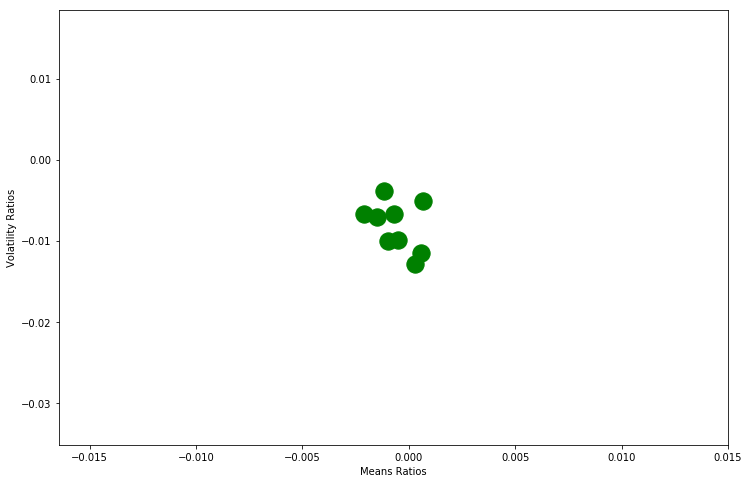

In [49]:
plt.figure(figsize = (12,8))
plt.scatter(Unified_Frame['Means Ratios'], Unified_Frame['Volatility Ratios'],s = 300,color='g')
plt.xlabel('Means Ratios')
plt.ylabel('Volatility Ratios')

In [50]:
Unified_Frame['Means Ratios'],Unified_Frame['Volatility Ratios']

(date
 2009   -0.002090
 2010   -0.000686
 2011    0.000650
 2012   -0.001163
 2013    0.000275
 2014   -0.000999
 2015    0.000566
 2016   -0.000497
 2017   -0.001509
 Name: Means Ratios, dtype: float64, date
 2009   -0.006768
 2010   -0.006712
 2011   -0.005146
 2012   -0.003886
 2013   -0.012825
 2014   -0.010038
 2015   -0.011521
 2016   -0.009898
 2017   -0.007108
 Name: Volatility Ratios, dtype: float64)

In [51]:
NoN_hedged_means, hedged_means

([0.002642884476993387,
  0.000923204856609635,
  -0.0009288871132007826,
  0.0018559687197445653,
  -0.00018831488576259226,
  0.0010833344363790198,
  -0.0006702016999938411,
  0.0006424172846236735,
  0.001610717788423793],
 [0.0005473217187711483,
  0.00023701060437538536,
  -0.0002791738135529189,
  0.00069055347232379,
  8.690862818625826e-05,
  8.365814382340074e-05,
  -0.00010454126390421759,
  0.00014488092232340738,
  9.947277011637392e-05])

In [52]:
asset_data['TYH'].loc[starts[5]:ends[5]].mean()

-0.00018831488576259226

In [53]:
betas[4]

0.7061709374376182

In [142]:
hedged_volatilities, NoN_hedged_volatilities

([0.007764645328681911,
  0.005565702074230404,
  0.009370800068719265,
  0.005242814489574423,
  0.00571327532913786,
  0.002090337676027605,
  0.0025796337165866477,
  0.00205552522951853,
  0.002444455291813727],
 [0.01463212697641382,
  0.012360812107082028,
  0.014591865586602075,
  0.009164494065317138,
  0.018778799669518065,
  0.012251574370989948,
  0.014264837544527556,
  0.012072621943040682,
  0.009621146253858159])